In [2]:
import numpy as np 
import Shafaq as sr 
from Shafaq.Equations import *
import matplotlib.pyplot as plt 

time =  0.1 CFL =  24.0 0.196
time =  0.2 CFL =  24.0 0.196
time =  0.30000000000000004 CFL =  24.0 0.196
time =  0.4 CFL =  24.0 0.196
time =  0.5 CFL =  24.0 0.196
time =  0.6 CFL =  24.0 0.196
time =  0.7 CFL =  24.0 0.196
time =  0.7999999999999999 CFL =  24.0 0.196
time =  0.8999999999999999 CFL =  24.0 0.196
time =  0.9999999999999999 CFL =  24.0 0.196
time =  1.0999999999999999 CFL =  24.0 0.196
time =  1.2 CFL =  24.0 0.196
time =  1.3 CFL =  24.0 0.196
time =  1.4000000000000001 CFL =  24.0 0.196
time =  1.5000000000000002 CFL =  24.0 0.196
time =  1.6000000000000003 CFL =  24.0 0.196
time =  1.7000000000000004 CFL =  24.0 0.196
time =  1.8000000000000005 CFL =  24.0 0.196
time =  1.9000000000000006 CFL =  24.0 0.196
time =  2.0000000000000004 CFL =  24.0 0.196
time =  2.1000000000000005 CFL =  24.0 0.196
time =  2.2000000000000006 CFL =  24.0 0.196
time =  2.3000000000000007 CFL =  24.0 0.196
time =  2.400000000000001 CFL =  24.0 0.196
time =  2.500000000000001 CFL =  24.0 0.

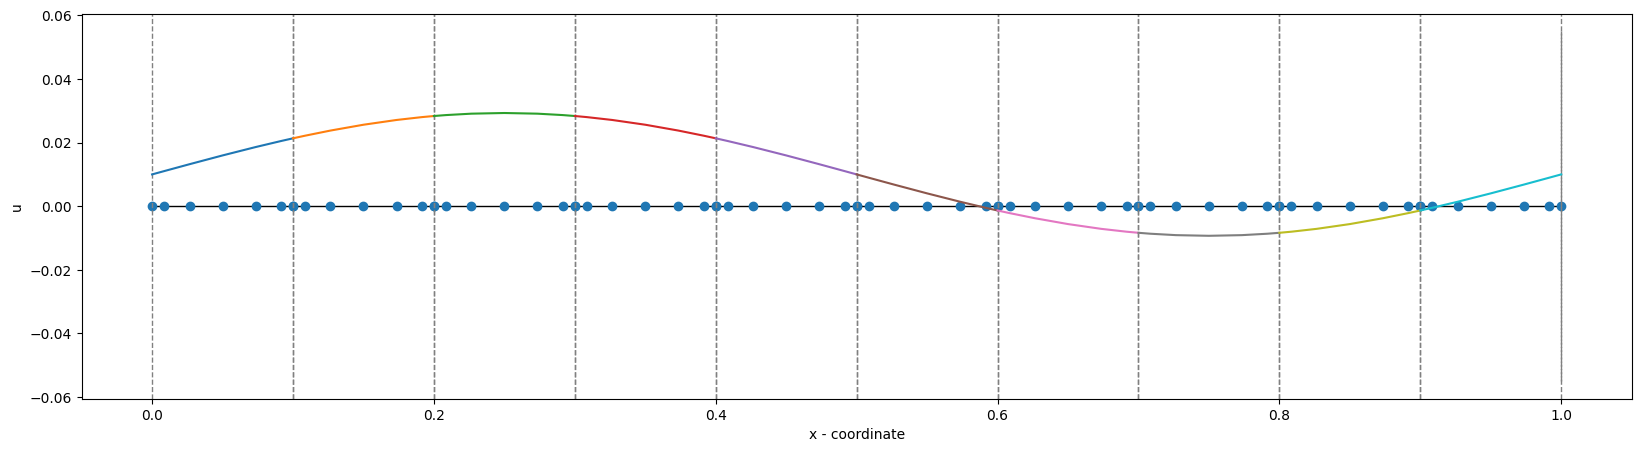

In [ ]:
n = 6
xi , w = sr.legendre.lgl(n)
D = sr.sbp_d(n)
Q = sr.legendre.sbp_q(n)
P = sr.legendre.sbp_p(n)
a = 1
flux = sr.AdvectiveFlux(a=a)
nex = 10 
nu = 0.0001
mesh = sr.Mesh1D(0, 1, nex, n, xi, w, D, P, Q, Equation1D(flux, nu, 0))

def sin_short(x):
    return np.sin(2*x*np.pi)+0.01*np.ones_like(x)

def constant(x): 
    return np.ones_like(x)

mesh.set_initial_condition(sin_short)
mesh.rhs()

dt = 1e-1
tf = 5000

t = 0
#mesh.step_rk4(dt)
while t < tf:
    mesh.step_rk4(dt)
    t +=dt
    #dS = sum(elem.u @ (elem.P_phys @ elem.rhs) for elem in mesh.elements)
    #print(t, 2*dt/(mesh.elements[0].J/n), dt*nu/(mesh.elements[0].J/(n+1))**2)
    #print(np.sum(elem.D_phys, axis=1) for elem in mesh.elements )
    print("time = ", t, "CFL = ", 2*dt/(mesh.elements[0].J/n), dt/((mesh.elements[0].J/(n+1))**2 / nu))
    #print("time = ", t, "CFL = ", 2*a*dt/(mesh.elements[0].J/n))

fig, ax = plt.subplots(figsize=(20,5))
mesh.plot(ax=ax)
for i, elem in enumerate(mesh.elements):
    ax.plot(elem.x, elem.u, label="Solution")

In [21]:
for i, elem in enumerate(mesh.elements):
    dS = sum(elem.u @ (elem.P_phys @ elem.rhs) for elem in mesh.elements)
    print(t, dS, 2*dt/(mesh.elements[0].J/n), dt*nu/(mesh.elements[0].J/(n+1))**2)

1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998
1000.0000000001588 -7.349842051577749e-07 24.0 0.19599999999999998


In [ ]:
D = mesh.elements[0].D_ref
P = mesh.elements[0].P_ref
P@D + D.T @ P
#J = mesh.elements[0].J
#np.linalg.norm(D/(J/2))

In [ ]:
n = 5 
u = np.array([1, 1, 1, 0, 0, 0])
P = sr.sbp_p(n)
D = sr.sbp_d(n)
Q = sr.sbp_q(n)


F = sr.BurgerFlux()
f = F.flux(u[-1])
f_ec_mer = sr.f_ssr_meriam(u[-1], u[0],u[-1], u[0],  F.flux_ec)
-f + f_ec_mer

#u.T @ P @ (F)
